In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Categorical, Integer, Continuous
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/IKRAM/Documents/data_students.csv', sep = ';')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Preprocesamiento de datos

Codificación de variables categóricas y estandarización de variables numéricas

In [3]:
col_num = ['Previous qualification (grade)','Admission grade','Age at enrollment',
           'Curricular units 1st sem (credited)','Curricular units 1st sem (enrolled)',
           'Curricular units 1st sem (evaluations)','Curricular units 1st sem (approved)',
           'Curricular units 1st sem (grade)','Curricular units 1st sem (without evaluations)',
           'Curricular units 2nd sem (credited)','Curricular units 2nd sem (enrolled)',
           'Curricular units 2nd sem (evaluations)','Curricular units 2nd sem (approved)','Curricular units 2nd sem (grade)',
           'Curricular units 2nd sem (without evaluations)','Unemployment rate','Inflation rate','GDP']
col_cat=[]
target = ['Target']

for col in df.columns:
    if (not col in col_num)&(col!='Target'):
        col_cat.append(col)

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[col_num] = scaler.fit_transform(df_scaled[col_num])

In [5]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_cols = encoder.fit_transform(df_scaled[col_cat])
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(col_cat))
df_scaled_encoded = pd.concat([df_scaled.drop(columns=col_cat), encoded_df], axis=1)

dict_targ = {'Dropout':0, 'Graduate':1, 'Enrolled':2}
df_scaled_encoded['Target'].replace(dict_targ, inplace=True)

df_scaled_encoded.head(10)

,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),...,Debtor_0,Debtor_1,Tuition fees up to date_0,Tuition fees up to date_1,Gender_0,Gender_1,Scholarship holder_0,Scholarship holder_1,International_0,International_1
0,-0.804841,0.022229,-0.430363,-0.300813,-2.528560,-1.986068,-1.521257,-2.197102,-0.199273,-0.282442,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,2.076819,1.071926,-0.562168,-0.300813,-0.109105,-0.550192,0.418050,0.693599,-0.199273,-0.282442,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,-0.804841,-0.150419,-0.562168,-0.300813,-0.109105,-1.986068,-1.521257,-2.197102,-0.199273,-0.282442,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,-0.804841,-0.509526,-0.430363,-0.300813,-0.109105,-0.071567,0.418050,0.575611,-0.199273,-0.282442,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,-2.473171,1.002867,2.864765,-0.300813,-0.109105,0.167746,0.094832,0.349468,-0.199273,-0.282442,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
5,0.036907,-0.841009,3.523791,-0.300813,-0.512348,0.407059,0.094832,0.251144,-0.199273,-0.282442,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
6,0.711822,0.098194,-0.693973,-0.300813,0.294137,0.167746,0.741268,0.549064,-0.199273,-0.282442,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
7,-1.032341,-0.958410,-0.166753,-0.300813,-0.512348,-0.789505,-1.521257,-2.197102,-0.199273,-0.282442,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
8,0.332656,0.160347,-0.298558,-0.300813,-0.109105,-0.071567,0.418050,0.667789,-0.199273,-0.282442,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
9,0.408490,-0.274725,-0.693973,-0.300813,-0.109105,0.167746,0.094832,0.156754,-0.199273,-0.282442,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


## DIvisión de datos en conjuntos de prueba y entrenamiento

In [6]:
X = df_scaled_encoded.drop('Target', axis=1)
y = df_scaled_encoded['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Creación del modelo y optimización de parámetros con algoritmos genéticos

Se crea el árbol y se optimizan hiperparámetros por medio de algoritmos genéticos (GASerchCV). Dado que la dimensionalidad aumentó debido a la codificación usada en un principio, con los nuevos parámetros se evalua la precisión y se observa la importancia de cada variable para poder eliminar variables innecesarias. Eliminando todas las variables con importancia cero puede observarse que no se compromete la precisión, por el contrario, esto aumenta la eficiencia computacional al volver a realizar una nueva optimización para el modelo con menos variables.


In [7]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

params_grid = {
    "min_samples_split": Integer(2, 20),
    "min_samples_leaf": Integer(1, 5),
    "min_weight_fraction_leaf": Continuous(0, 0.5),
    "criterion": Categorical(["gini", "entropy"]),
    "max_depth": Integer(2, 10),
}
evolved_estimator = GASearchCV(
    tree,
    cv=StratifiedKFold(n_splits=3, shuffle=True),
    scoring="accuracy",
    population_size=50,
    generations=30,
    crossover_probability=0.9,
    mutation_probability=0.05,
    param_grid=params_grid,
    algorithm="eaSimple",
    n_jobs=-1,
    verbose=True)

evolved_estimator.fit(X_train, y_train)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	50    	0.701176	0.031669   	0.74354    	0.629522   
1  	44    	0.721912	0.0108151  	0.746447   	0.708979   
2  	44    	0.728837	0.0120943  	0.749031   	0.711563   
3  	40    	0.738159	0.00684651 	0.750646   	0.719961   
4  	40    	0.73812 	0.00726946 	0.750646   	0.717377   
5  	40    	0.738327	0.00675768 	0.751615   	0.722222   
6  	42    	0.740149	0.00651535 	0.751615   	0.724483   
7  	42    	0.74011 	0.00526353 	0.751615   	0.728036   
8  	44    	0.736712	0.0163823  	0.751615   	0.630814   
9  	48    	0.738178	0.00483332 	0.751615   	0.728036   
10 	48    	0.739981	0.00553354 	0.751615   	0.721576   
11 	46    	0.738857	0.0066926  	0.751615   	0.708979   
12 	46    	0.73865 	0.00672487 	0.751615   	0.7177     
13 	46    	0.740433	0.00602921 	0.752261   	0.719961   
14 	42    	0.737125	0.0157217  	0.752261   	0.635336   
15 	46    	0.739193	0.0061326  	0.752261   	0.723191   
16 	44    	0.737997	0.005919   	0.752261   	0.72

GASearchCV(algorithm='eaSimple', crossover_probability=0.9,
           cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
           estimator=DecisionTreeClassifier(max_depth=4, min_samples_leaf=4,
                                            min_samples_split=16,
                                            min_weight_fraction_leaf=0.016529514211802543),
           generations=30, mutation_probability=0.05, n_jobs=-1,
           param_grid={'criterion': <sklearn_genetic.space....
                       'max_depth': <sklearn_genetic.space.space.Integer object at 0x000001CFD839A050>,
                       'min_samples_leaf': <sklearn_genetic.space.space.Integer object at 0x000001CFDE5B1E40>,
                       'min_samples_split': <sklearn_genetic.space.space.Integer object at 0x000001CFDE5B2080>,
                       'min_weight_fraction_leaf': <sklearn_genetic.space.space.Continuous object at 0x000001CFDE5B2D70>},
           return_train_score=True, scoring='accuracy')

In [10]:
y_predict_ga = evolved_estimator.predict(X_test)
accuracy = accuracy_score(y_test, y_predict_ga)
print(evolved_estimator.best_params_)
print("accuracy score: ", "{:.2f}".format(accuracy))

{'min_samples_split': 16, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.016529514211802543, 'criterion': 'gini', 'max_depth': 4}
accuracy score:  0.74


In [20]:
tree_ga = DecisionTreeClassifier(min_samples_split=16, 
                               min_samples_leaf=4, 
                               min_weight_fraction_leaf= 0.016529514211802543, 
                               criterion='gini', 
                               max_depth=4)
tree_ga.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=4, min_samples_split=16,
                       min_weight_fraction_leaf=0.016529514211802543)

In [21]:
features = list(df_scaled_encoded.drop('Target', axis=1).columns)
feature_importance = pd.DataFrame(tree_ga.feature_importances_, index=features, columns=['Importance']).sort_values(by='Importance', ascending=False)
feature_importance.head(20)

,Importance
Curricular units 2nd sem (approved),0.815114
Tuition fees up to date_0,0.071254
Curricular units 1st sem (enrolled),0.053132
Curricular units 1st sem (evaluations),0.027357
Age at enrollment,0.009379
Curricular units 2nd sem (grade),0.009041
Curricular units 2nd sem (evaluations),0.005822
Admission grade,0.005793
Mother's occupation_3,0.003109
Mother's occupation_9,0.000000


In [26]:
X_new = df_scaled_encoded[['Curricular units 2nd sem (approved)', 'Tuition fees up to date_0',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)', 'Age at enrollment',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (evaluations)', 'Admission grade',
       "Mother's occupation_3"]]
y = df_scaled_encoded['Target']
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

In [33]:
new_tree = DecisionTreeClassifier()

params_grid = {
    "min_samples_split": Integer(2, 15),
    "min_samples_leaf": Integer(1, 5),
    "min_weight_fraction_leaf": Continuous(0, 0.5),
    "criterion": Categorical(["gini", "entropy"]),
    "max_depth": Integer(2, 7),
}
evolved_estimator = GASearchCV(
    new_tree,
    cv=StratifiedKFold(n_splits=3, shuffle=True),
    scoring="accuracy",
    population_size=50,
    generations=30,
    crossover_probability=0.9,
    mutation_probability=0.05,
    param_grid=params_grid,
    algorithm="eaSimple",
    n_jobs=-1,
    verbose=True)

evolved_estimator.fit(X_train, y_train)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	50    	0.703307	0.0324034  	0.744509   	0.624677   
1  	30    	0.721596	0.0086013  	0.744509   	0.708979   
2  	40    	0.724283	0.0117304  	0.751938   	0.709302   
3  	46    	0.72938 	0.0122316  	0.751938   	0.712532   
4  	46    	0.736163	0.012484   	0.754845   	0.709625   
5  	42    	0.742855	0.00620647 	0.754845   	0.729651   
6  	46    	0.743062	0.00720747 	0.758721   	0.714793   
7  	44    	0.742868	0.00769652 	0.758721   	0.713824   
8  	38    	0.74427 	0.00589337 	0.758721   	0.729651   
9  	44    	0.742455	0.00874572 	0.758721   	0.714147   
10 	44    	0.744942	0.00621688 	0.758721   	0.732558   
11 	42    	0.745052	0.00584739 	0.758721   	0.730943   
12 	34    	0.744813	0.00674915 	0.758721   	0.719961   
13 	48    	0.74334 	0.00726159 	0.758721   	0.719961   
14 	46    	0.742009	0.0069713  	0.758721   	0.726421   
15 	44    	0.742377	0.0074146  	0.758721   	0.719961   
16 	44    	0.741848	0.00805075 	0.758721   	0.70

GASearchCV(algorithm='eaSimple', crossover_probability=0.9,
           cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
           estimator=DecisionTreeClassifier(max_depth=5, min_samples_leaf=2,
                                            min_weight_fraction_leaf=0.012407395634694784),
           generations=30, mutation_probability=0.05, n_jobs=-1,
           param_grid={'criterion': <sklearn_genetic.space.space.Categorical obje...
                       'max_depth': <sklearn_genetic.space.space.Integer object at 0x000001CFE32548E0>,
                       'min_samples_leaf': <sklearn_genetic.space.space.Integer object at 0x000001CFE32556F0>,
                       'min_samples_split': <sklearn_genetic.space.space.Integer object at 0x000001CFE53BC490>,
                       'min_weight_fraction_leaf': <sklearn_genetic.space.space.Continuous object at 0x000001CFE32545B0>},
           return_train_score=True, scoring='accuracy')

In [34]:
y_predict_ga = evolved_estimator.predict(X_test)
accuracy = accuracy_score(y_test, y_predict_ga)
print(evolved_estimator.best_params_)
print("accuracy score: ", "{:.2f}".format(accuracy))

{'min_samples_split': 2, 'min_samples_leaf': 2, 'min_weight_fraction_leaf': 0.012407395634694784, 'criterion': 'gini', 'max_depth': 5}
accuracy score:  0.74


## Gráficos de la evolución

El primero muestra la evolución de la optimización en cada generación y el segundo, la estrategia del algoritmo para la optimización de los parámetros.

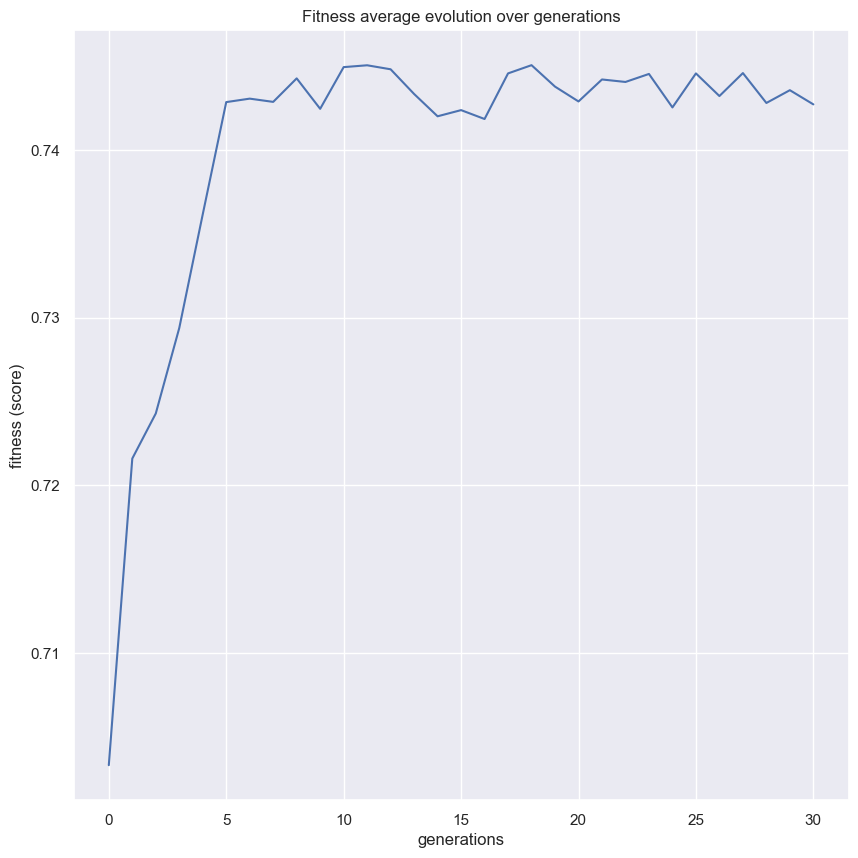

In [35]:
from sklearn_genetic.plots import plot_fitness_evolution, plot_search_space

plot_fitness_evolution(evolved_estimator)
plt.show()

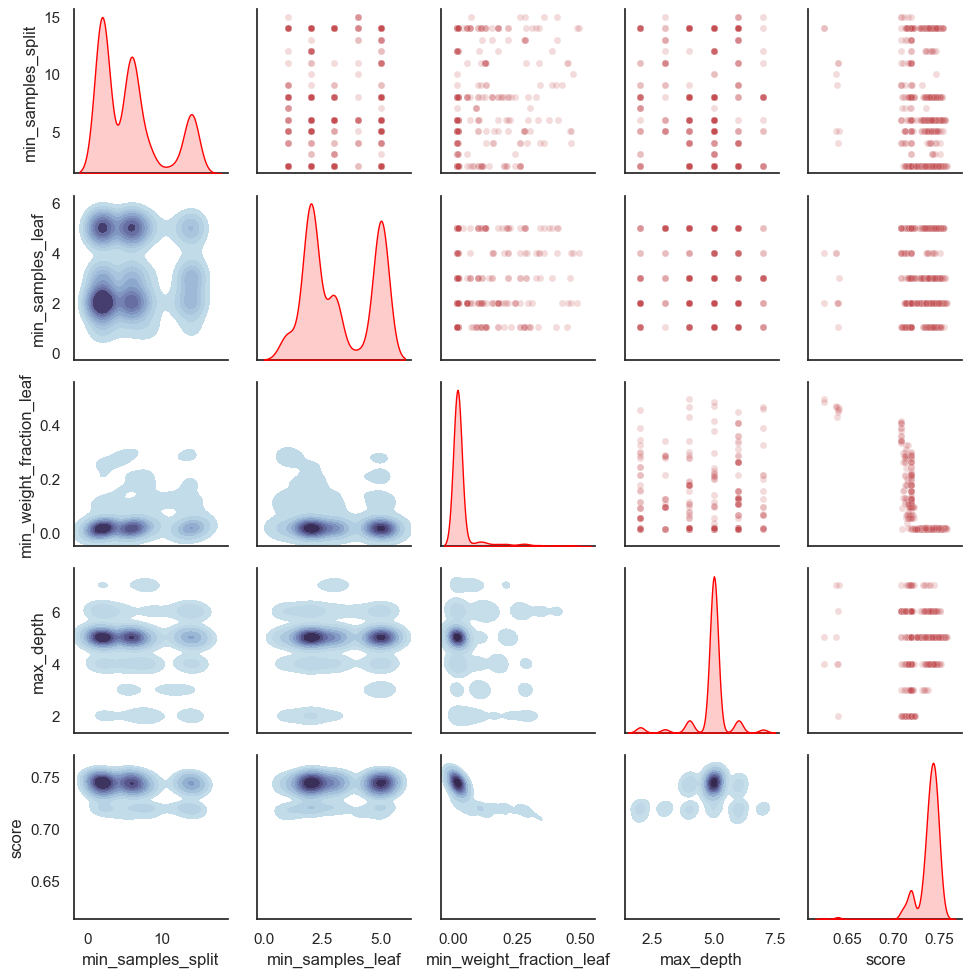

In [36]:
plot_search_space(evolved_estimator)
plt.show()